# **Prueba de dispersion de datos aleatorios implementando usando Multi-Layer Perceptron (MLP) algorithm**

# Importaciones 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
import warnings

warnings.filterwarnings('ignore')

# Creación de datos simulados

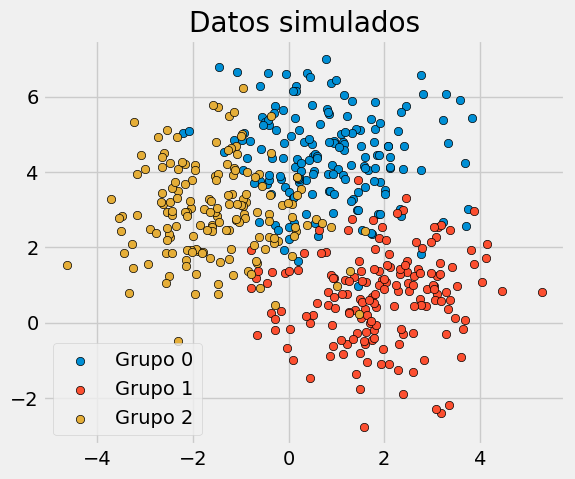

In [4]:
X, y = make_blobs(
        n_samples    = 500, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1.2, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],  # grafica por cada categoria primero los y que son 0....
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],  # color diferente a acda grupo y la forma es la misma
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();

# Creación de diferentes modelos de AI

In [6]:
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),#capas oucultas 1 con 5 neuronas
                learning_rate_init=0.01,#ratio del aprendizajes cambios en la neurona
                solver = 'lbfgs',#método 
                max_iter = 1000,# cantidad maxima e iteraciones de entrenamiento
                random_state = 123# pesos aleatorios
            )
modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),#una capa oculta con 10 neuronas
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=1000,
              random_state=123, solver='lbfgs')

# Gráfico de las predicciones

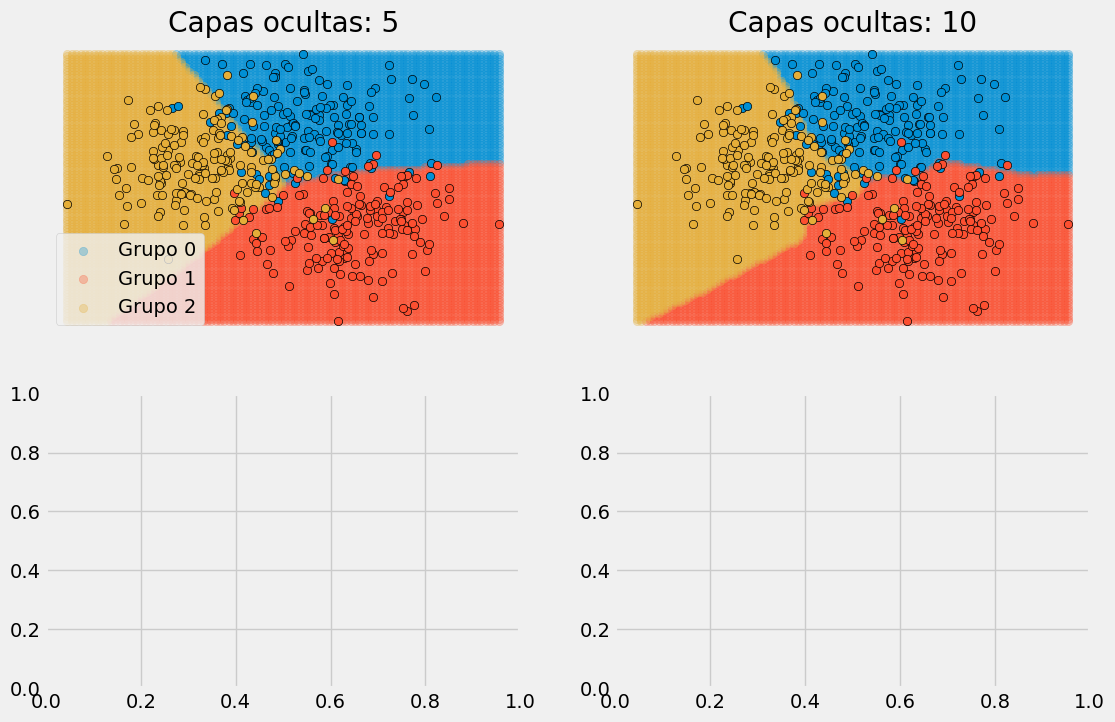

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()

grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)

xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2]):
    
    predicciones = modelo.predict(X_grid)
    
    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        ) 
    
    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )
    
    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')

axs[0].legend();